In [52]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [53]:
df = pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [55]:
df.shape

(12976, 28)

In [56]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [57]:
df[df['essay_set']==7]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,1784,1,Do a adults and kids spend to much time on the...,3,4,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,1785,1,My opinion is that people should have computer...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1781,1786,1,"Dear readers, I think that its good and bad to...",1,1,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(axis=1,inplace=True)
df.shape

(12976, 6)

In [8]:
df = df.iloc[:500]
df.shape

(500, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [10]:
df['essay_set'].value_counts()

essay_set
1    500
Name: count, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)
df.dropna(subset=['essay', 'domain1_score'], inplace=True)

# Exclude the 'essay' column
numeric_df = df.select_dtypes(include='number')

In [12]:
numeric_df.shape

(500, 3)

In [13]:
numeric_df.head()

,essay_id,essay_set,domain1_score
0,1,1,8
1,2,1,9
2,3,1,7
3,4,1,10
4,5,1,8


In [14]:
min(numeric_df['domain1_score'])

2

In [15]:
max(numeric_df['domain1_score'])

12

In [16]:
numeric_df.skew()

essay_id         0.005714
essay_set        0.000000
domain1_score   -0.497040
dtype: float64

In [17]:
numeric_df.kurtosis()

essay_id        -1.203358
essay_set        0.000000
domain1_score    1.426665
dtype: float64

C:\Users\NasolPC\AppData\Local\Temp\ipykernel_12668\3629082780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

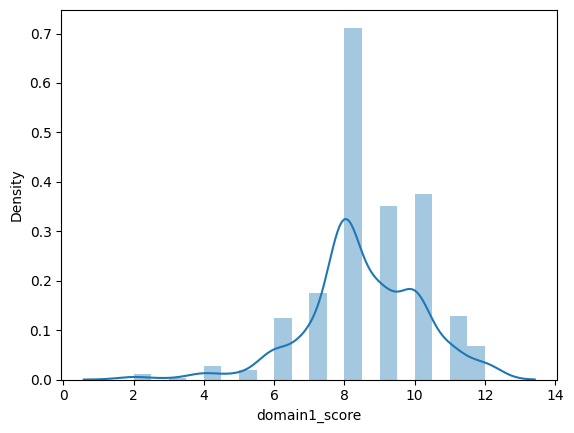

In [18]:
#Check Skewness
sns.distplot(numeric_df['domain1_score'])

In [19]:
numeric_df[numeric_df['essay_set']==2]['domain1_score']

Series([], Name: domain1_score, dtype: int64)

In [20]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

numeric_df['final_score']=numeric_df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [21]:
numeric_df['final_score']

0       6
1       7
2       5
3       8
4       6
       ..
495    10
496     7
497     8
498     6
499     5
Name: final_score, Length: 500, dtype: int64

C:\Users\NasolPC\AppData\Local\Temp\ipykernel_12668\3924945609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

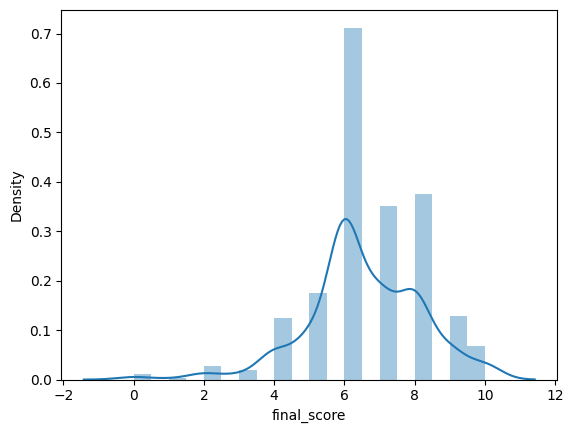

In [22]:
sns.distplot(numeric_df['final_score'])

In [23]:
numeric_df.skew()

essay_id         0.005714
essay_set        0.000000
domain1_score   -0.497040
final_score     -0.497040
dtype: float64

In [24]:
numeric_df.head()

,essay_id,essay_set,domain1_score,final_score
0,1,1,8,6
1,2,1,9,7
2,3,1,7,5
3,4,1,10,8
4,5,1,8,6


In [25]:
numeric_df.describe()

,essay_id,essay_set,domain1_score,final_score
count,500.000000,500.0,500.000000,500.000000
mean,251.192000,1.0,8.536000,6.536000
std,145.264182,0.0,1.637702,1.637702
min,1.000000,1.0,2.000000,0.000000
25%,125.750000,1.0,8.000000,6.000000
50%,250.500000,1.0,8.000000,6.000000
75%,377.250000,1.0,10.000000,8.000000
max,502.000000,1.0,12.000000,10.000000


In [26]:
numeric_df.drop('domain1_score',axis=1,inplace=True)

In [27]:
numeric_df.head()

,essay_id,essay_set,final_score
0,1,1,6
1,2,1,7
2,3,1,5
3,4,1,8
4,5,1,6


In [28]:
# Bring back the 'essay' column
df = pd.concat([df.drop(columns=numeric_df.columns, errors='ignore'), numeric_df], axis=1)
df.head()

,essay,domain1_score,essay_id,essay_set,final_score
0,"Dear local newspaper, I think effects computer...",8,1,1,6
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,2,1,7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,3,1,5
3,"Dear Local Newspaper, @CAPS1 I have found that...",10,4,1,8
4,"Dear @LOCATION1, I know having computers has a...",8,5,1,6


In [29]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [30]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [31]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [32]:
df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...


In [33]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count
    
    

In [34]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [35]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


In [36]:
prep_df.shape

(500, 15)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
# count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
# feature_names = vectorizer.get_feature_names_out()
# X = count_vectors.toarray()
# X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis = 1)
# y_full = prep_df['final_score'].values
# X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)



# Vectorize the text data
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
X_text = count_vectors.toarray()

# Get additional features (ensure all are numeric)
additional_features = prep_df.iloc[:, 5:]
# Check if there are any non-numeric columns and encode them
for col in additional_features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    additional_features[col] = le.fit_transform(additional_features[col])

X_additional = additional_features.values

# Combine text features with additional features
X_full = np.concatenate((X_additional, X_text), axis=1)

# Get the target variable
y_full = prep_df['final_score'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)



SVR

In [39]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_with_pp",'wb'))

#Use Saved Model
# clf = pickle.load(open('Saved_Models/SVR_with_pp', 'rb'))
# y_pred=clf.predict(X_test)
# print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

In [41]:
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:0.84


In [42]:
df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...
